# <font color=blue>Assignments for "Making Predictions"</font>

In this exercise, you'll predict house prices using your model. To complete this assignment, submit a link to a Jupyter notebook containing your solutions to the following tasks:

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
import statsmodels.api as sm
from statsmodels.tools.eval_measures import mse, rmse
font = {'family': 'arial',
        'color':  'darkred',
        'weight': 'normal',
        'size': 14,
        }

# Display preferences.
%matplotlib inline
pd.options.display.float_format = '{:.3f}'.format

import warnings
warnings.filterwarnings(action="ignore")
house_prices_df = pd.read_csv("https://djl-lms-assets.s3.eu-central-1.amazonaws.com/datasets/house_prices.csv", sep = ";")
house_prices_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.000,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.000,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.000,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.000,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.000,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


- Split your data into train and test sets.

In [28]:
# Y is the target variable
y = house_prices_df['SalePrice']
# X is the feature set
X = house_prices_df[['OverallQual', 'TotalBsmtSF','1stFlrSF','GrLivArea','GarageCars','GarageArea','YearBuilt']]


In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 465)

print("The number of observations in training set is {}".format(X_train.shape[0]))
print("The number of observations in test set is {}".format(X_test.shape[0]))

The number of observations in training set is 1168
The number of observations in test set is 292


- Estimate your model from the previous lesson in the train set. Assess the goodness of fit of your model.

In [4]:
# We add constant to the model as it's a best practice
X_train = sm.add_constant(X_train)
# We fit an OLS model using statsmodels
results1 = sm.OLS(y_train, X_train).fit()
# We print the summary results
display(results.summary())

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.770
Model:                            OLS   Adj. R-squared:                  0.769
Method:                 Least Squares   F-statistic:                     693.0
Date:                Sun, 09 May 2021   Prob (F-statistic):               0.00
Time:                        23:49:08   Log-Likelihood:                -17472.
No. Observations:                1460   AIC:                         3.496e+04
Df Residuals:                    1452   BIC:                         3.500e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -6.942e+05   8.49e+04     -8.174      0.000   -8.61e+05   -5.28e+05
OverallQual  2.079e+04   1160.683     17.916      0.000    1.85e+04    2.31e+04
TotalBsmtSF    20.2475      4.290      4.720      0.000      11.833      28.662
1stFlrSF       13.4436      4.962      2.709      0.007       3.710      23.177
GrLivArea      48.0007      2.727     17.599      0.000      42.650      53.351
GarageCars   9969.4283   3040.904      3.278      0.001    4004.393    1.59e+04
GarageArea     16.8085     10.309      1.631      0.103      -3.413      37.030
YearBuilt     310.9118     44.563      6.977      0.000     223.496     398.327
==============================================================================
Omnibus:                      449.404   Durbin-Watson:                   1.981
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            48372.513
Skew:                          -0.326   Prob(JB):                         0.00
Kurtosis:                      31.191   Cond. No.                     2.57e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.57e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

- Predict the house prices in the test set and evaluate the performance of your model using the metrics we mentioned in this lesson.

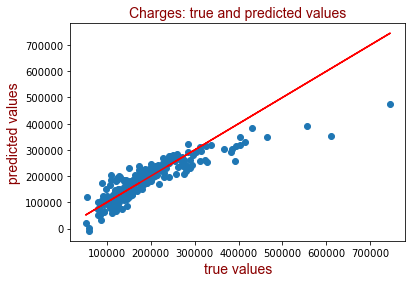

Mean absolute error of the prediction is: 26537.342642896794
Mean squared error of the prediction is: 1615985315.2630439
Root mean squared error of the prediction is: 40199.31983582613
Mean absolute percentage error of the prediction is: 15.651951153659446


In [5]:
# We add constant to the model as it's a best practice
# to do so everytime!
X_test = sm.add_constant(X_test)

# We are making predictions here
y_preds = results.predict(X_test)

plt.scatter(y_test, y_preds)
plt.plot(y_test, y_test, color="red")
plt.xlabel("true values", fontdict = font)
plt.ylabel("predicted values", fontdict = font)
plt.title("Charges: true and predicted values", fontdict = font)
plt.show()

print("Mean absolute error of the prediction is: {}".format(mean_absolute_error(y_test, y_preds)))
print("Mean squared error of the prediction is: {}".format(mse(y_test, y_preds)))
print("Root mean squared error of the prediction is: {}".format(rmse(y_test, y_preds)))
print("Mean absolute percentage error of the prediction is: {}".format(np.mean(np.abs((y_test - y_preds) / y_test)) * 100))


- Is the performance of your model satisfactory? Why?

**Performance of the model can be better because MSE value is very high.**

- Try to improve your model in terms of prediction performance by adding or removing some variables.

# Second model
- 1stFlrSF: First Floor square feet
- 2ndFlrSF: Second floor square feet

I decided to addition these 2 variables and remove **1stFlrSF**,**GrLivArea**,**GarageArea**

In [6]:
house_prices_df["TotalFlr"] = house_prices_df["1stFlrSF"] + house_prices_df["2ndFlrSF"]

In [7]:
XX = house_prices_df[['OverallQual', 'TotalBsmtSF','GarageCars','YearBuilt','TotalFlr']]

In [8]:
X2_train, X2_test, y2_train, y2_test = train_test_split(XX, y, test_size = 0.2, random_state = 465)

print("The number of observations in training set is {}".format(X2_train.shape[0]))
print("The number of observations in test set is {}".format(X2_test.shape[0]))

The number of observations in training set is 1168
The number of observations in test set is 292


In [9]:
X2_train = sm.add_constant(X2_train)

results2 = sm.OLS(y2_train, X2_train).fit()
results2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.767
Model:                            OLS   Adj. R-squared:                  0.766
Method:                 Least Squares   F-statistic:                     765.0
Date:                Sun, 09 May 2021   Prob (F-statistic):               0.00
Time:                        23:49:08   Log-Likelihood:                -13962.
No. Observations:                1168   AIC:                         2.794e+04
Df Residuals:                    1162   BIC:                         2.797e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -6.416e+05   9.23e+04     -6.950      0.000   -8.23e+05    -4.6e+05
OverallQual   2.04e+04   1291.148     15.800      0.000    1.79e+04    2.29e+04
TotalBsmtSF    23.1159      3.089      7.483      0.000      17.055      29.177
GarageCars   1.634e+04   2030.011      8.047      0.000    1.24e+04    2.03e+04
YearBuilt     287.4664     48.546      5.921      0.000     192.218     382.715
TotalFlr       51.2534      2.871     17.851      0.000      45.620      56.887
==============================================================================
Omnibus:                      391.997   Durbin-Watson:                   1.923
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            35028.752
Skew:                          -0.561   Prob(JB):                         0.00
Kurtosis:                      29.805   Cond. No.                     2.29e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.29e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

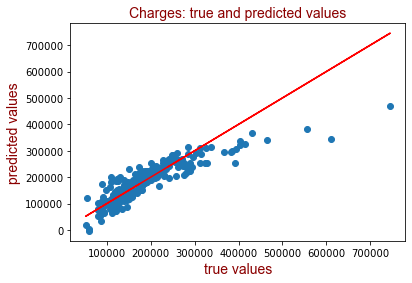

Mean absolute error of the prediction is: 26941.21690418463
Mean squared error of the prediction is: 1689049696.6705992
Root mean squared error of the prediction is: 41098.04979157283
Mean absolute percentage error of the prediction is: 15.74479742385139


In [13]:
# We add constant to the model as it's a best practice
# to do so everytime!
X2_test = sm.add_constant(X2_test)

# We are making predictions here
y2_preds = results2.predict(X2_test)

plt.scatter(y2_test, y2_preds)
plt.plot(y2_test, y2_test, color="red")
plt.xlabel("true values", fontdict = font)
plt.ylabel("predicted values", fontdict = font)
plt.title("Charges: true and predicted values", fontdict = font)
plt.show()

print("Mean absolute error of the prediction is: {}".format(mean_absolute_error(y2_test, y2_preds)))
print("Mean squared error of the prediction is: {}".format(mse(y2_test, y2_preds)))
print("Root mean squared error of the prediction is: {}".format(rmse(y2_test, y2_preds)))
print("Mean absolute percentage error of the prediction is: {}".format(np.mean(np.abs((y2_test - y2_preds) / y2_test)) * 100))

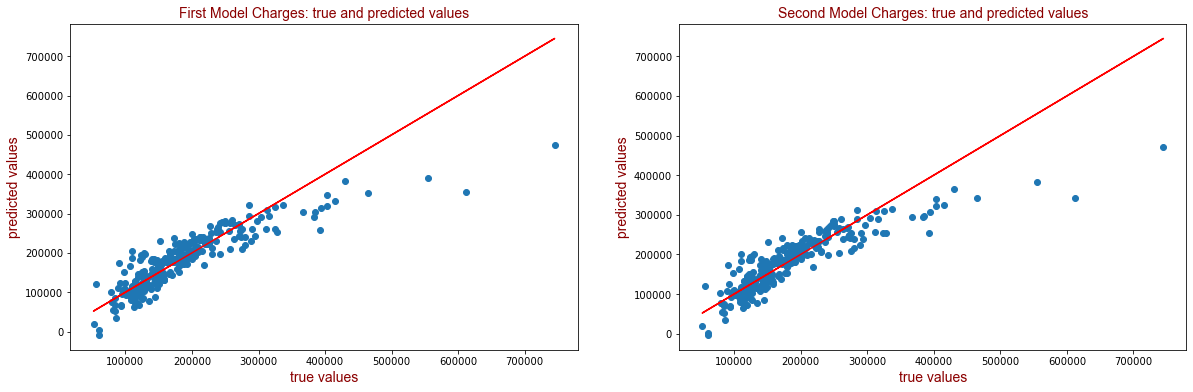

In [11]:
plt.figure(figsize=(20, 6))
plt.subplot(1,2,1)
plt.scatter(y_test, y_preds)
plt.plot(y_test, y_test, color = "red")
plt.title("First Model Charges: true and predicted values", fontdict = font)
plt.xlabel("true values", fontdict = font)
plt.ylabel("predicted values", fontdict = font)

plt.subplot(122)
plt.scatter(y2_test, y2_preds)
plt.plot(y2_test, y2_test, color = "red")
plt.title("Second Model Charges: true and predicted values", fontdict = font)
plt.xlabel("true values", fontdict = font)
plt.ylabel("predicted values", fontdict = font)

plt.show()

In [27]:
mae1 = mean_absolute_error(y_test, y_preds)
mse1 = mse(y_test, y_preds)
rmse1 = rmse(y_test, y_preds)
mape1 = (abs((y_test - y_preds)) / y_test).mean() * 100

mae2 = mean_absolute_error(y2_test, y2_preds)
mse2 = mse(y2_test, y2_preds)
rmse2 = rmse(y2_test, y2_preds)
mape2 = (abs((y2_test - y2_preds)) / y2_test).mean() * 100

In [26]:
print("Model 1 subtraction to Model 2:")
print(f"Mean absolute error difference : %{100 * (mae2-mae1)/mae1:.2f}") 
print(f"Mean squared error             : %{100 * (mse2-mse1)/mse1:.2f}")
print(f"Root mean squared error        : %{100 * (rmse2-rmse1)/rmse1:.2f}")
print(f"Mean absolute percentage error : %{100 * (mape2-mape1)/mape1:.2f}")

Model 1 subtraction to Model 2:
Mean absolute error difference : %1.52
Mean squared error             : %4.52
Root mean squared error        : %2.24
Mean absolute percentage error : %0.59


1. **The test set performance** of the first model is better than model 2 with respect to all of the four metrics we use. Compared to the previous model, this second model seems to predict high values of the target worser. 

2. **Goodness of fit metrics:**
**1st model:**
- R-squared:0.770  Adj.R-squared:0.769
- F-statistic:693.0
- AIC:3.496  BIC:3.500

**2nd model**
- R-squared:0.767  Adj.R-squared:0.766
- F-statistic:765.0
- AIC: 2.794  BIC:2.797

**Comparison:**
- R-squared values: first model has the better values. However both are close and they are between on70-90% is ideal.
- F-statistic: 2nd model has the best performance.
- 2nd model AIC and BIC metrics are lower than first model. Which means 2nd model is fitted better than the first.